In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy
import os
import matplotlib.colors as mcolors
import matplotlib.cm

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/pyxsim/source_generators/light_cone.py:11: VisibleDeprecationWarning: Development of the CosmologySplice module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://github.com/yt-project/yt_astro_analysis for further information.
  from yt.analysis_modules.cosmological_observation.api import LightCone
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/yt/analysis_modules/cosmological_observation/api.py:28: VisibleDeprecationWarning: Development of the LightCone module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://githu

In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'
plt.rcParams['lines.linewidth'] = 2.5
from matplotlib.ticker import MultipleLocator

In [3]:
base     = "/mnt/lustre/ast2/astadit/CGM/Pyxsim/Spectra/"
Msun     = 2.e33
mp       = 1.67e-24
folder   = ["HR_0821_1e-6_SFR3/", "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"]

filename = ["DD0220/", "DD0300/",  "DD0400/",  "DD0500/",\
            "DD0090/", "DD0110/", "DD0130/", "DD0150/"]

time = [['2.2 Gyr', '3.0 Gyr', '4.0 Gyr', '5.0 Gyr'],\
        ['900 Myr', '1.1 Gyr', '1.3 Gyr', '1.5 Gyr']]
time = np.asarray(time)

No handles with labels found to put in legend.
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


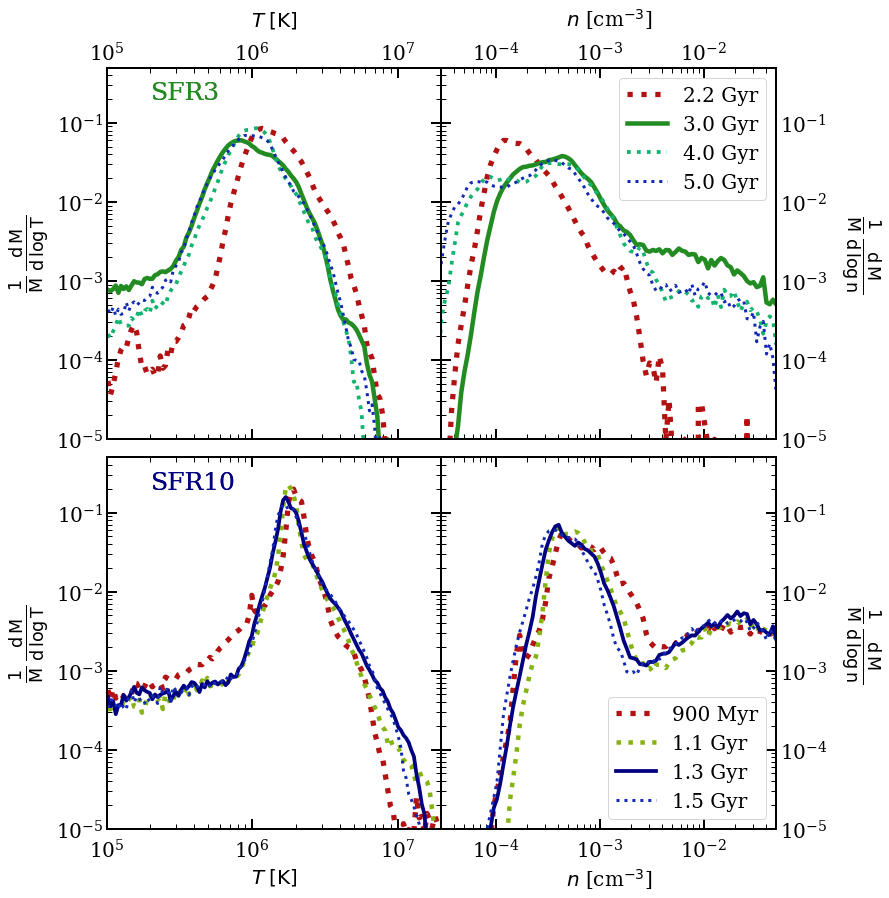

In [6]:
i = 0
ll = ['-.', ':', '-*', '--', '-o', '-^']

hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 1.5, 8)
colors = [hsv2rgb(hue) for hue in hues]

label   = [r'SFR3', r'SFR10', ]
short   = ["ldlsfr","hdhsfr" ]
color = ['forestgreen', 'navy', 'darkmagenta']


colors = [hsv2rgb(hue) for hue in hues]
f, ax = plt.subplots(2, 2, figsize=(12,14), gridspec_kw = {'wspace':0, 'hspace':0.05})
j = 0 

for i in range(2):  
    lw = 5.25    
    j = 0 
    hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
    hues = np.linspace(0, 2.5, len(time[i]))
    for file in filename:
        
        file_loc = base + folder[i] + file
        
        if(os.path.exists(file_loc)):
            
            temp    = np.loadtxt(file_loc + "temp_cellm.txt",usecols=0)
            masst   = np.loadtxt(file_loc + "temp_cellm.txt",usecols=1)
            
            dens    = np.loadtxt(file_loc + "dens_cellm.txt",usecols=0)
            massd   = np.loadtxt(file_loc + "dens_cellm.txt",usecols=1)
            if([i,j]==[0,1] or [i,j]==[1,2]): 
                ls = '-'
                rang = color[i]
            else:     
                ls = ':'
                rang = colors[j]
            ax[i,1].plot(dens/mp, massd/np.sum(massd), ls = ls, color=rang,  label=time[i,j], lw = lw)
            ax[i,0].plot(temp, masst/np.sum(massd), ls = ls, color=rang, lw = lw)
            j = j + 1
            lw = lw - 0.75
       
                
    plt.setp(ax,'yscale','log')
    plt.setp(ax,'xscale','log')
#     plt.setp(ax[:,1],'yticklabels', '')
#     plt.setp(ax[0,0],'xticklabels', '')
    plt.setp(ax, 'ylim',(1.e-5,0.5))
#     plt.setp(ax[0,:], 'ylim',(1.e-5,1.))
    
    plt.setp(ax[:,0], 'xlim',(1.e5,2.e7))
    plt.setp(ax[:,1], 'xlim',(3.e-5,5.e-2))
    
    plt.subplots_adjust(wspace=None)
    
    ax[0,1].legend(loc = 'upper right')
    ax[1,1].legend(loc = 'lower right')
    
    
    ax[0,0].tick_params(axis='y', which='both', right=True)
    ax[0,0].tick_params(axis='x', which='both', bottom=True, top = True, labelbottom=False, labeltop=True)
    ax[0,0].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,T}$", fontsize=25)
#     ax[0,0].xaxis.set_label_position("top")
    
    ax[0,1].tick_params(axis='y', which='both', left=True, labelright = True, labelleft = False)
    ax[0,1].tick_params(axis='x', which='both', bottom=True, top = True, labeltop=True, labelbottom=False)
    ax[0,1].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,n}$", rotation=270, fontsize=25, labelpad=55)
    ax[0,1].yaxis.set_label_position("right")
   
    
    
    ax[1,0].tick_params(axis='y', which='both', right=True)
    ax[1,0].tick_params(axis='x', which='both', pad=10, top=True)
    ax[1,0].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,T}$", fontsize=25)
    
    
    ax[1,1].tick_params(axis='x', which='both', pad=10, top=True)
    ax[1,1].tick_params(axis='y', which='both', right=True, labelright = True, labelleft = False)
    ax[1,1].set_ylabel(r"$\frac{1}{\rm M}\,\frac{\rm d\, M}{\rm d\, log\,n}$", rotation=270, fontsize=25, labelpad=55)
    ax[1,1].yaxis.set_label_position("right")

    ax[0,0].set_xlabel(r'$T\;[{\rm K}]$', labelpad=15)
    ax[0,0].xaxis.set_label_position("top")
    plt.setp(ax[1,0], 'xlabel',r'$T\;[{\rm K}]$')
    
    
    ax[0,1].set_xlabel(r'$n$ [cm$^{-3}$]', labelpad=15)
    ax[0,1].xaxis.set_label_position("top")
    plt.setp(ax[1,1], 'xlabel',r'$n$ [cm$^{-3}$]')
    
    
    plt.tight_layout()
    ax[0,0].text(2.e5,2.e-1,label[0], color=color[0], fontsize=25)
    ax[1,0].text(2.e5,2.e-1,label[1], color=color[1], fontsize=25)
#     plt.text(9e-4,5.e-1,label[1], color=color[1])

plt.savefig('time-series-mass-dist.pdf', bbox_inches='tight', dpi=160)

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
No handles with labels found to put in legend.


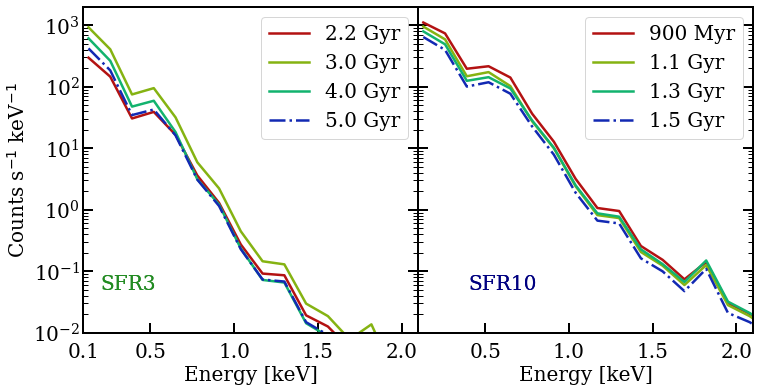

In [22]:
i = 0
plt.rcParams['font.size']=20

hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 1.5, 8)
colors = [hsv2rgb(hue) for hue in hues]

label   = [r'SFR3', r'SFR10', ]
short   = ["ldlsfr","hdhsfr" ]
color = ['forestgreen', 'navy', 'darkmagenta']


colors = [hsv2rgb(hue) for hue in hues]

f, ax = plt.subplots(1, 2, figsize=(12,6), gridspec_kw = {'wspace':0, 'hspace':0})
j = 0 
hsv2rgb = lambda hue: mcolors.hsv_to_rgb([hue,0.9,0.7])
hues = np.linspace(0, 1.0, len(filename))
for i in [0,1]:  
    
    j = 0 
    for file in filename:
        
        file_loc = base + folder[i] + file
        
        if(os.path.exists(file_loc)):
            
            energy  = np.loadtxt(file_loc + "sim_spec_LR.txt",usecols=0)
            simLR   = np.loadtxt(file_loc + "sim_spec_LR.txt",usecols=1)
            
            if(j==5 or j==3): ls = '-.'
            else:     ls = '-'
            ax[i].plot(energy, simLR/energy, ls = ls, color=colors[j], label=time[i,j])
            
            j = j + 1
                
    plt.setp(ax,'yscale','log')
    plt.setp(ax[1],'yticklabels', '')
    plt.setp(ax[0],'xticks', (0.1,0.5,1.0,1.5, 2.0))
    plt.setp(ax, 'ylim',(1.e-2,2.e3))
    plt.setp(ax, 'xlim',(0.1,2.1))
    plt.subplots_adjust(wspace=None)
    ax[0].legend(loc = 'upper right')
    ax[1].legend(loc = 'upper right')
    ax[1].tick_params(axis='y', which='both', left=True)
    ax[0].tick_params(axis='y', which='both', right=True)
    ax[1].tick_params(axis='y', which='both', right=True)
    ax[0].tick_params(axis='x', which='both', pad=10)
    ax[1].tick_params(axis='x', which='both', pad=10)
    plt.setp(ax, 'xlabel',r'Energy [keV]')
    plt.setp(ax[0], 'ylabel',r'Counts s$^{-1}$ keV$^{-1}$')
    plt.text(-1.8,5.e-2,label[0], color=color[0])
    plt.text(0.4,5.e-2,label[1], color=color[1])


plt.savefig(short[0] + '-' + short[1] + '_spec_LR.pdf', bbox_inches='tight', dpi=160)